# Challenge 3

In [60]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [61]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [62]:
#your code here
print(titanic.dtypes)
print(titanic.shape)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(1309, 12)


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [63]:
# your code here- numerical variable
titanic.select_dtypes(exclude=['object'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [64]:
#your code here- categorical variable
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

#### Use the appropriate visulalization to show the distribution of the column `Age`

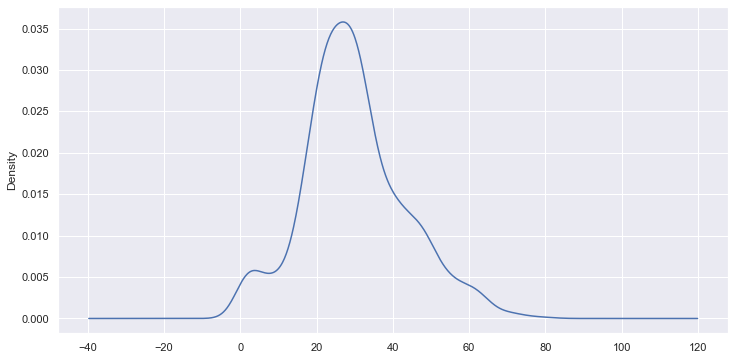

In [65]:
# your code here
plt.figure(figsize=(12,6))
titanic.Age.plot.kde()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

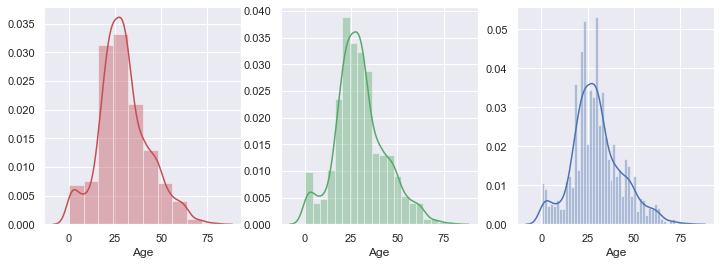

In [66]:
# your code here
f, axes = plt.subplots(1, 3,figsize=(12,4))
sns.distplot(titanic["Age"],bins=10,ax=axes[0],color="r")
sns.distplot(titanic["Age"],bins=20,ax=axes[1],color="g")
sns.distplot(titanic["Age"],bins=50,ax=axes[2],color="b")

#### Whether the bin size affects your plot? Why?

In [67]:
#your comment here
#A mas bins mas detalle :)

#### Use seaborn to show the distribution of the column `Age`

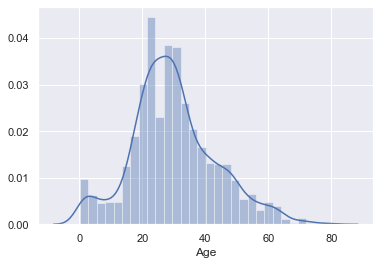

In [68]:
# your code here
sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

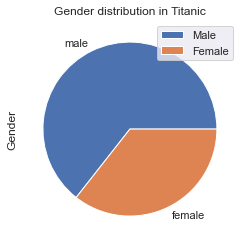

In [69]:
titanic["Gender"].value_counts().plot(kind="pie")
plt.title("Gender distribution in Titanic")
plt.legend(["Male","Female"])

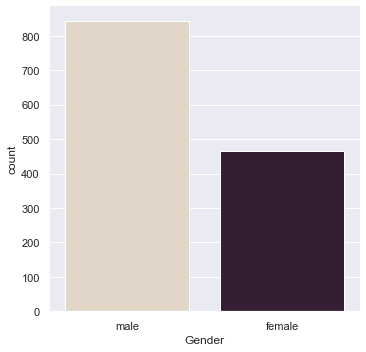

In [70]:
# your code here- 2nd way
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


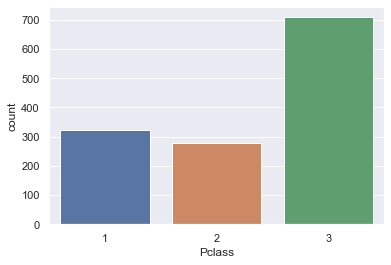

In [71]:
# your code here
sns.set(style="darkgrid")
sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

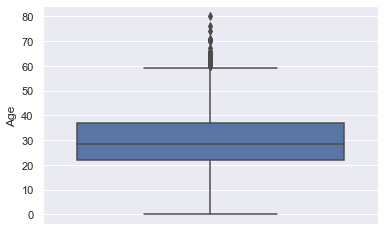

In [72]:
sns.boxplot(y="Age", data=titanic)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [73]:
# La mayor parte de la poblacion se encuentra entre los 20 y los 40 años, la media esta en los 29 aprox. 


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

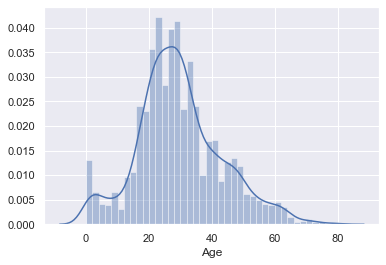

In [81]:
#your code here
sns.distplot(titanic["Age"], bins=40, kde=True)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [75]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

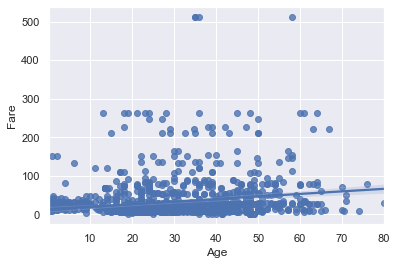

In [85]:
#your code-1st way
sns.regplot(x="Age", y="Fare", data=titanic)

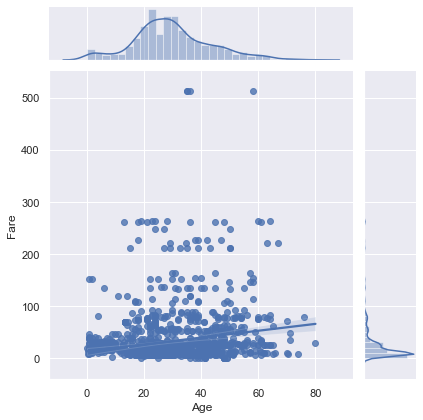

In [86]:
sns.jointplot("Age", "Fare",data=titanic, kind="reg")

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

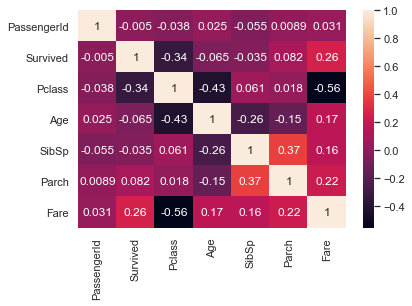

In [87]:
#your code here
sns.heatmap(titanic.corr(),annot=True)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#P_class and fare

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

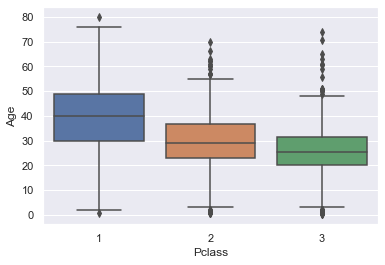

In [88]:
#your code here
sns.boxplot(x="Pclass",y="Age",data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

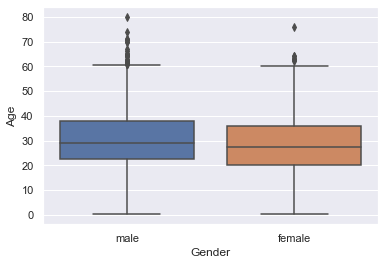

In [89]:
#your code here
sns.boxplot(x="Gender",y="Age",data=titanic)
